In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint
from plotting_utils import get_legend_name, remove_outliers

In [277]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [278]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [279]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [280]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [281]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

# original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'sampling', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'ga', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'ga2', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'ga', 'simulation'] = '-'
# original_df.loc[original_df['method'] == 'ga2', 'simulation'] = '-'
# original_df.loc[original_df['method'] == 'sampling', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'
original_df.loc[original_df['method'] == 'sampling', 'almostRatio'] = '-'
original_df.loc[original_df['method'] == 'ga', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'kp', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'score', 'almostRatio'] = '-'

original_df.loc[original_df['method'] == 'ga', 'simulation'] = original_df.loc[original_df['method'] == 'ga', 'evo']


100%|██████████| 247/247 [00:08<00:00, 28.55it/s]


In [282]:
original_df

,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanGenerateRuntimes,StdGenerateRuntimes,MeanGenerateScores,StdGenerateScores,...,Target_RainbowPiece,method,player,objective,evo,simulation,almostRatio,playerDepth,gp,Sum_Matched
0,1,200,2023-06-17 07:37:24.645,ed4b221f,0,0,3.191348,1.990742,0.046333,0.187546,...,3,ga,0,knowledge,16,16,-,-,NaN,150
1,2,200,2023-06-17 07:59:11.763,ed4b221f,0,0,4.906240,3.070558,0.046942,0.188525,...,3,ga,0,knowledge,16,16,-,-,NaN,144
2,3,200,2023-06-17 08:22:03.190,ed4b221f,0,0,5.463821,3.076268,0.048054,0.190547,...,3,ga,0,knowledge,16,16,-,-,NaN,138
3,4,200,2023-06-17 08:45:08.246,ed4b221f,0,0,5.540969,3.249036,0.048687,0.194478,...,3,ga,0,knowledge,16,16,-,-,NaN,108
4,5,200,2023-06-17 09:08:00.600,ed4b221f,0,0,5.421199,3.161585,0.048959,0.194434,...,3,ga,0,knowledge,16,16,-,-,NaN,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,200,2023-06-19 01:33:35.125,bb9c5c38,0,0,2.055959,0.099924,0.227373,0.396706,...,5,sampling,9,-,NaN,40,-,-,NaN,108
311,312,200,2023-06-19 01:42:17.682,bb9c5c38,0,0,2.046625,0.107653,0.227457,0.396748,...,5,sampling,9,-,NaN,40,-,-,NaN,84
312,313,200,2023-06-19 01:51:58.348,bb9c5c38,0,0,2.040323,0.099961,0.227432,0.396766,...,5,sampling,9,-,NaN,40,-,-,NaN,102
313,314,200,2023-06-19 02:00:23.657,bb9c5c38,0,0,2.044421,0.098462,0.227419,0.396719,...,5,sampling,9,-,NaN,40,-,-,NaN,84


In [283]:
# 완료하지 못했을 경우, 에피소드 최대길이로 설정
original_df['ReachedKnowledgeStep'] = original_df['ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q1ReachedKnowledgeStep'] = original_df['Q1ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q2ReachedKnowledgeStep'] = original_df['Q2ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q3ReachedKnowledgeStep'] = original_df['Q3ReachedKnowledgeStep'].replace(-1, 200)


In [284]:
for i in range(5):
    original_df['playerDepth'] = original_df['playerDepth'].replace(str(i), i)
for i in range(100, 1000, 100):
    original_df['simulation'] = original_df['simulation'].replace(str(i), i)

In [285]:
match_result = original_df.groupby(['method', 'objective', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
     }
)
match_result




C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


method
                               count
method   objective simulation       
ga       knowledge 16           1070
                   2            1350
                   4            1091
                   8            1271
         score     16            820
                   2            1340
                   4            1031
                   8            1084
mcts     knowledge 100          5508
                   200          5510
                   400          5506
                   1000         5506
         score     100          5506
                   200          5506
                   400          5505
                   1000         5502
random   -         -            5500
sampling -         10           5500
                   20           5500
                   30           5056
                   40           4292

### Full Result

In [286]:
# Drop outliers
match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
# match_result = match_result[~match_result['playerDepth'].isin([2])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]



columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep']

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'objective', 'playerDepth', 'simulation'])[column].transform(remove_outliers)
    match_result = match_result[match_result[column] != -9999]

match_result_noout = match_result.copy()

# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'objective', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'MeanGenerateRuntimes',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        'MeanGenerateRuntimes': ['mean'],

     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


method MeanGenerateRuntimes
                               count                 mean
method   objective simulation                            
ga       knowledge 16           1014             6.042887
                   2            1264             4.569517
                   4            1003             5.037439
                   8            1203             5.094399
         score     16            760             7.399702
                   2            1289             4.440890
                   4             992             5.291846
                   8            1031             5.590128
mcts     knowledge 100          5096             0.413112
                   200          5059             0.475700
                   400          5070             0.475203
                   1000         5078             0.500354
         score     100          5307             0.461840
                   200          5303             0.511370
                   400          5312             0.549112
                   1000         5305             0.563033
random   -         -            5499             0.000001
sampling -         10           5498             0.636719
                   20           5497             1.198031
                   30           5055             1.661299
                   40           4291             2.154969

### Depth 1 Result

In [287]:
# Drop outliers
match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
match_result = match_result[~match_result['playerDepth'].isin([2, 3])]
match_result = match_result[~match_result['objective'].isin([2, 3])]
# match_result = match_result[~match_result['simulation'].isin([200])]


columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep'
                              ]

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'objective', 'playerDepth', 'simulation'])[column].transform(
        remove_outliers
    )
    match_result = match_result[match_result[column] != -9999]

# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)

match_result.rename(columns={
                            'ReachedKnowledgeStep': '100%',
                            'Q1ReachedKnowledgeStep': '25%',
                            'Q2ReachedKnowledgeStep': '50%',
                            'Q3ReachedKnowledgeStep': '75%'
                            }, inplace=True)


match_result = match_result.groupby(['method', 'objective', 'simulation'])[
                                      '25%',
                                      '50%',
                                      '75%',
                                      '100%',
                                      'MeanGenerateRuntimes',
                                      'Sum_Matched'].agg(
    {
        'Sum_Matched': ['mean',],
        '25%': ['mean'],
        '50%': ['mean'],
        '75%': ['mean'],
        '100%': ['mean'],
        'MeanGenerateRuntimes': ['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Sum_Matched        25%         50%         75%  \
                                     mean       mean        mean        mean   
method   objective simulation                                                  
ga       knowledge 16          117.218935  27.493097   35.703156   46.150888   
                   2           115.044304  35.435918   46.593354   63.570411   
                   4           112.199402  38.984048   52.421735   71.986042   
                   8           116.413965  28.709061   36.790524   47.654198   
         score     16          217.113158  39.260526   53.003947   74.798684   
                   2           188.718386  44.992242   62.942591   87.769589   
                   4           161.231855  51.609879   71.399194  100.835685   
                   8           215.610087  40.241513   53.871969   76.678952   
mcts     knowledge 100         116.313579  44.887559   60.295330   81.028650   
                   200         116.957897  42.544376   56.313303   76.462344   
                   400         117.641420  41.891913   55.866272   74.748915   
                   1000        116.821583  41.104766   54.442103   73.071682   
         score     100         159.210854  48.773695   67.365555   95.128321   
                   200         161.762399  46.525929   64.477843   92.549689   
                   400         163.045934  46.118976   63.366340   90.556288   
                   1000        163.360603  45.279359   62.505938   89.624505   
random   -         -            95.538462  84.290598  111.130024  145.462630   
sampling -         10           91.161150  83.444707  111.536377  146.223172   
                   20           91.086047  84.111152  111.236856  146.662179   
                   30           90.859347  83.812265  112.344016  147.189318   
                   40           90.669774  82.992309  111.374039  145.496854   

                                     100% MeanGenerateRuntimes  
                                     mean                 mean  
method   objective simulation                                   
ga       knowledge 16           50.748521             6.042887  
                   2            71.284810             4.569517  
                   4            81.259222             5.037439  
                   8            52.645054             5.094399  
         score     16           84.042105             7.399702  
                   2            99.283941             4.440890  
                   4           113.992944             5.291846  
                   8            87.959263             5.590128  
mcts     knowledge 100          92.306907             0.413112  
                   200          85.851749             0.475700  
                   400          83.456607             0.475203  
                   1000         81.838322             0.500354  
         score     100         107.393631             0.461840  
                   200         105.074109             0.511370  
                   400         103.025602             0.549112  
                   1000        101.726861             0.563033  
random   -         -           157.955265             0.000001  
sampling -         10          159.227901             0.636719  
                   20          159.845734             1.198031  
                   30          160.494955             1.661299  
                   40          158.836635             2.154969

In [288]:
match_result.to_latex('match_count_table.tex', float_format="%.3f", escape=True)


In [289]:
display_graphs = ['random', 'ga',
                  'sampling_20',
                   'mcts_knowledge_1.0_1000_1',
                   'mcts_score_1000_1']

{'ga',
 'mcts_knowledge_1.0_1000_1',
 'mcts_knowledge_1.0_100_1',
 'mcts_knowledge_1.0_200_1',
 'mcts_knowledge_1.0_400_1',
 'mcts_score_1000_1',
 'mcts_score_100_1',
 'mcts_score_200_1',
 'mcts_score_400_1',
 'random',
 'sampling_10',
 'sampling_20',
 'sampling_30',
 'sampling_40'}


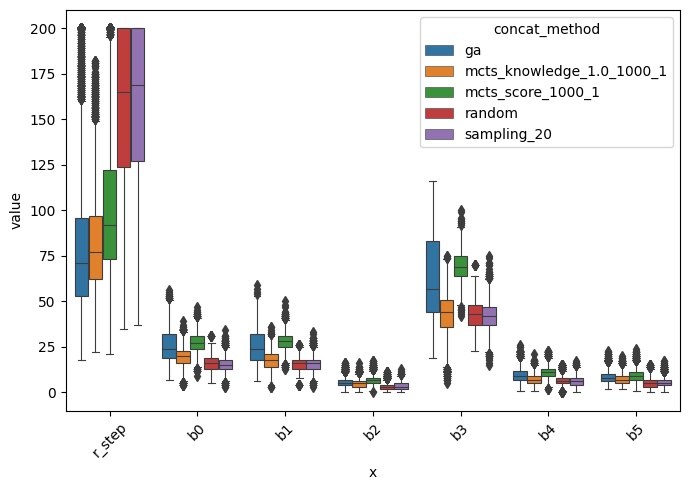

In [290]:
melted_df = match_result_noout.copy()

melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random', 'ga',
                                                       'sampling_20',
                                                       'mcts_knowledge_1.0_1000_1',
                                                       'mcts_score_1000_1'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')
melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df, linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('matched_block.png')

In [291]:
from statannot import add_stat_annotation
from itertools import combinations

In [292]:
player_df = match_result_noout[match_result_noout['player'] == str(player_no)]
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = ['25', '50', '75', '100']

sns.set_palette('Set2')
# melted_df = melted_df.groupby(['player', 'method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'], value_vars=[*_columns], ignore_index=False)

melted_df = melted_df[melted_df['concat_method'].isin(display_graphs)]

plt.figure(figsize=(7, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

pairs = list()
for i in range(25, 101, 25):
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'random')))
    pairs.append(((str(i), 'random'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'random'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_score_1000_1'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'sampling_20')))

add_stat_annotation(ax, x="variable", y="value", hue="concat_method", data=melted_df,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside', verbose=1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.tight_layout()
plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    # plt.show()

NameError: name 'player_no' is not defined

In [ ]:

melted_df = match_result_noout.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = ['25', '50', '75', '100']

sns.set_palette('Set3')
# melted_df = melted_df.groupby(['player', 'method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'], value_vars=[*_columns], ignore_index=False)

melted_df = melted_df[melted_df['concat_method'].isin(display_graphs)]


plt.figure(figsize=(7, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

pairs = list()
for i in range(25, 101, 25):
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'random')))
    pairs.append(((str(i), 'random'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'random'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_score_1000_1'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'sampling_20')))

add_stat_annotation(ax, x="variable", y="value", hue="concat_method", data=melted_df,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside', verbose=1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_title(f'Required Steps for Learning Skill (Player: All)')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.savefig(f'./figures/learning_steps_pA', dpi=300)
# plt.show()